# 日本のCOVID19感染者数分析(情報提供:NHK) 観察用

In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")

In [3]:
pref["日付"] = pd.to_datetime(pref["日付"] )

In [4]:
latest_date_str = pref["日付"].max().strftime("%Y/%m/%d")

In [5]:
del pref["都道府県コード"]
del pref["各地の感染者数_累計"]
del pref["各地の死者数_累計"]

In [6]:
all_jp = pref.copy().groupby(["日付"], as_index=False).sum()


In [7]:
all_jp["weekday"] = all_jp["日付"].dt.weekday
weekdays = pd.DataFrame({"曜日":["月","火","水","木","金","土","日"]})
all_jp = pd.merge(all_jp, weekdays, left_on="weekday", right_index=True, how="left")
pref["weekday"] = pref["日付"].dt.weekday
weekdays = pd.DataFrame({"曜日":["月","火","水","木","金","土","日"]})
pref = pd.merge(pref, weekdays, left_on="weekday", right_index=True, how="left")


## 移動平均

In [8]:
all_jp["感染者数移動平均7"] = all_jp["各地の感染者数_1日ごとの発表数"].rolling(7).mean()
all_jp["死者数移動平均7"] = all_jp["各地の死者数_1日ごとの発表数"].rolling(7).mean()
all_jp.tail()

,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,weekday,曜日,感染者数移動平均7,死者数移動平均7
567,2021-08-05,15214,8,3,木,11854.428571,9.428571
568,2021-08-06,15625,20,4,金,12554.142857,11.000000
569,2021-08-07,15742,14,5,土,13042.142857,11.714286
570,2021-08-08,14458,9,6,日,13656.285714,12.285714
571,2021-08-09,12061,12,0,月,14181.428571,12.428571


## 増減速度

In [9]:
all_jp["感染者数移動平均7増減"] = all_jp["感染者数移動平均7"].diff()
all_jp["死者数移動平均7増減"] = all_jp["死者数移動平均7"].diff()
all_jp.tail(7)

,日付,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,weekday,曜日,感染者数移動平均7,死者数移動平均7,感染者数移動平均7増減,死者数移動平均7増減
565,2021-08-03,12000,10,1,火,10549.857143,9.428571,626.000000,-0.285714
566,2021-08-04,14170,14,2,水,11207.714286,10.285714,657.857143,0.857143
567,2021-08-05,15214,8,3,木,11854.428571,9.428571,646.714286,-0.857143
568,2021-08-06,15625,20,4,金,12554.142857,11.000000,699.714286,1.571429
569,2021-08-07,15742,14,5,土,13042.142857,11.714286,488.000000,0.714286
570,2021-08-08,14458,9,6,日,13656.285714,12.285714,614.142857,0.571429
571,2021-08-09,12061,12,0,月,14181.428571,12.428571,525.142857,0.142857


### 感染者数前週同曜日比

In [10]:
import datetime
all_jp["新規感染者数先週比"] = all_jp["各地の感染者数_1日ごとの発表数"].pct_change(periods=7)
all_jp["死者数先週比"] = all_jp["各地の死者数_1日ごとの発表数"].pct_change(periods=7)
all_jp["新規感染者数先週差"] = all_jp["各地の感染者数_1日ごとの発表数"].diff(periods=7)
all_jp["死者数先週差"] = all_jp["各地の死者数_1日ごとの発表数"].diff(periods=7)


## 重症者数

In [11]:
severe = pd.read_csv("COVID-19-jp/severe_cases_daily.csv")
severe["Date"] = pd.to_datetime(severe["Date"])
severe = severe[severe.Prefecture=="ALL"]
severe.tail()

,Date,Prefecture,Severe cases
21696,2021-08-04,ALL,823
21744,2021-08-05,ALL,1020
21792,2021-08-06,ALL,1068
21840,2021-08-07,ALL,1138
21888,2021-08-08,ALL,1190


In [12]:
print(severe.count())
print(all_jp.count())

Date            457
Prefecture      457
Severe cases    457
dtype: int64
日付                  572
各地の感染者数_1日ごとの発表数    572
各地の死者数_1日ごとの発表数     572
weekday             572
曜日                  572
感染者数移動平均7           566
死者数移動平均7            566
感染者数移動平均7増減         565
死者数移動平均7増減          565
新規感染者数先週比           560
死者数先週比              519
新規感染者数先週差           565
死者数先週差              565
dtype: int64


## 曜日別陽性者集計

In [13]:
all_jp_week_mean = all_jp.groupby(["weekday"],as_index=False).mean()[["各地の感染者数_1日ごとの発表数","各地の死者数_1日ごとの発表数"]].sort_index()
all_jp_week_mean = pd.merge(all_jp_week_mean, weekdays, left_index=True, right_index=True, how="left")
all_jp_week_mean

,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,曜日
0,1311.231707,24.609756,月
1,1648.148148,32.419753,火
2,1951.037037,31.172840,水
3,2045.390244,28.304878,木
4,1989.670732,29.646341,金
5,2054.195122,23.853659,土
6,1733.804878,17.231707,日


In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


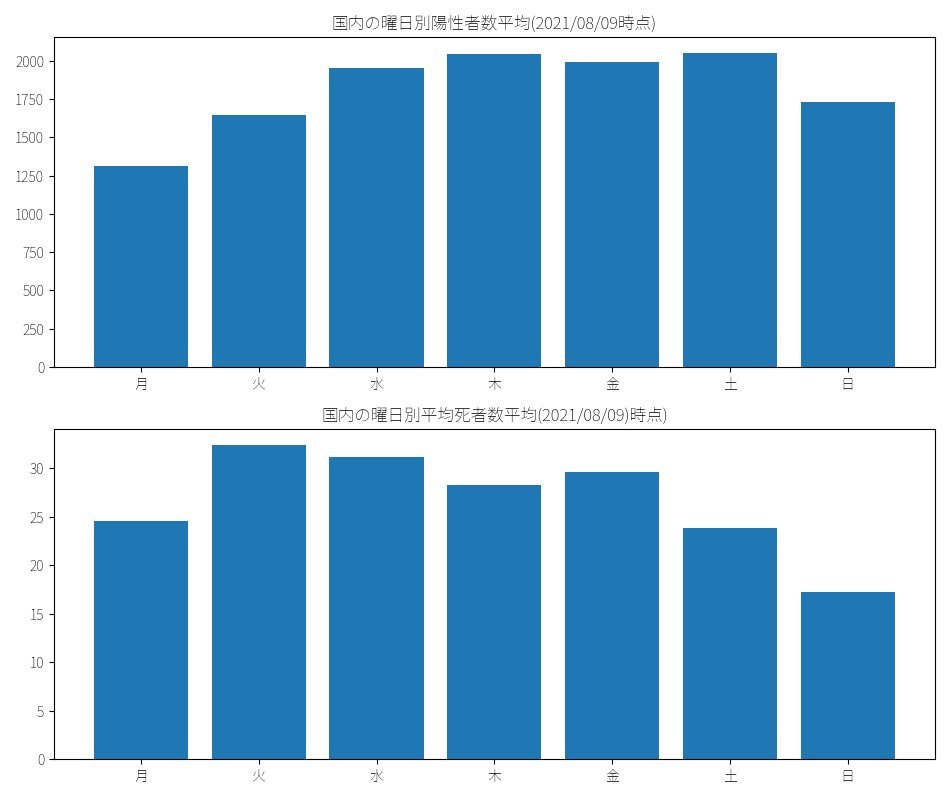

<BarContainer object of 7 artists>

In [15]:
fig=plt.figure(figsize=(9.5,8),tight_layout=True)
plt.subplot(2,1,1) # (rows, columns, panel number)
#fig, ax = plt.subplots(2,1,figsize=(9,8),tight_layout=True)
#wp_ax = ax[0]
plt.title("国内の曜日別陽性者数平均({}時点)".format(latest_date_str))
plt.bar(all_jp_week_mean["曜日"],all_jp_week_mean["各地の感染者数_1日ごとの発表数"])
#wd_ax = ax[1]
plt.subplot(2,1,2) # (rows, columns, panel number)
plt.title("国内の曜日別平均死者数平均({})時点)".format(latest_date_str))
plt.bar(all_jp_week_mean["曜日"],all_jp_week_mean["各地の死者数_1日ごとの発表数"])

## 2021-１〜６月の死者数

In [16]:
all_jp_2021_1st_half = all_jp.loc[(all_jp["日付"]>=pd.to_datetime("2021-01-01")) & (all_jp["日付"]<=pd.to_datetime("2021-06-30"))]["各地の死者数_1日ごとの発表数"]

In [17]:
print("日数:{}".format(all_jp_2021_1st_half.count()))
print("死者数:{}".format(all_jp_2021_1st_half.sum()))
print("1日あたり死者数:{}".format(all_jp_2021_1st_half.sum()/all_jp_2021_1st_half.count()))

日数:181
死者数:11288
1日あたり死者数:62.3646408839779


## 2021-7以降の死者数

In [18]:
all_jp_after202107 = all_jp.loc[all_jp["日付"]>=pd.to_datetime("2021-07-01")]["各地の死者数_1日ごとの発表数"]

In [19]:
print("日数:{}".format(all_jp_after202107.count()))
print("死者数:{}".format(all_jp_after202107.sum()))
print("1日あたり死者数:{}".format(all_jp_after202107.sum()/all_jp_after202107.count()))

日数:40
死者数:511
1日あたり死者数:12.775


## 東京

In [20]:
pref[pref["都道府県名"]=="東京都"].tail(10)

,日付,都道府県名,各地の感染者数_1日ごとの発表数,各地の死者数_1日ごとの発表数,weekday,曜日
7426,2021-07-31,東京都,4058,3,5,土
7427,2021-08-01,東京都,3058,0,6,日
7428,2021-08-02,東京都,2195,0,0,月
7429,2021-08-03,東京都,3709,7,1,火
7430,2021-08-04,東京都,4166,1,2,水
7431,2021-08-05,東京都,5042,1,3,木
7432,2021-08-06,東京都,4515,4,4,金
7433,2021-08-07,東京都,4566,4,5,土
7434,2021-08-08,東京都,4066,1,6,日
7435,2021-08-09,東京都,2884,3,0,月
